<a href="https://colab.research.google.com/github/dwikagt/SKRIPSI_P2P_STACKINGGA/blob/main/PERCOBAAN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats 

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('/content/loan_data.csv',  delimiter=',')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0
1,1,credit_card,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0
2,1,debt_consolidation,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0
3,1,debt_consolidation,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0
4,1,credit_card,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


In [4]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (9578, 14)


In [5]:
df2=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0,0,1,0,0,0,0
1,1,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0,1,0,0,0,0,0
2,1,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0,0,1,0,0,0,0
3,1,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0,0,1,0,0,0,0
4,1,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.15,344.76,12.18,10.39,672,10474.00,215372,82.10,2,0,0,1,0,0,0,0,0,0
9574,0,0.13,257.70,11.14,0.21,722,4380.00,184,1.10,5,0,0,1,0,0,0,0,0,0
9575,0,0.11,97.81,10.60,13.09,687,3450.04,10036,82.90,8,0,0,1,0,1,0,0,0,0
9576,0,0.16,351.58,10.82,19.18,692,1800.00,0,3.20,5,0,0,1,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


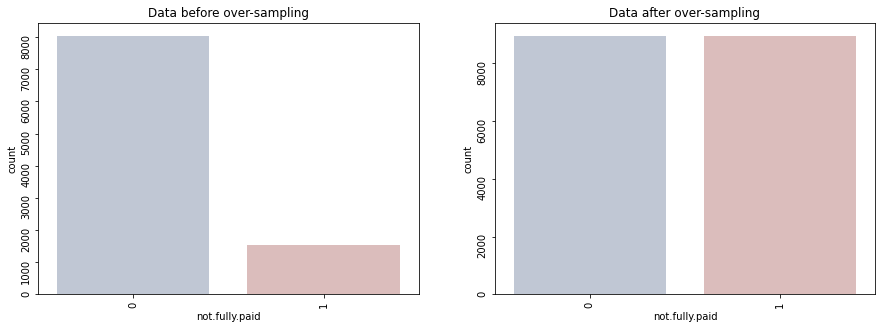

Data before over-sampling
0    8045
1    1533
Name: not.fully.paid, dtype: int64 

Data after over-sampling
0    8959
1    8959
Name: not.fully.paid, dtype: int64


In [6]:
# over-sampling
loan_data = df2
X = loan_data.iloc[:,:-1]
y = loan_data.iloc[:,-1]

res = RandomOverSampler(random_state=42)
x_res, y_res = res.fit_resample(X, y)

loan_data = x_res
loan_data['not.fully.paid'] = y_res


#visualazing samples
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not.fully.paid', data=df2, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not.fully.paid', data=loan_data, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(df2['not.fully.paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_data['not.fully.paid'].value_counts())

In [7]:
X = loan_data
y = loan_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
train, test = train_test_split(loan_data, test_size=0.3, random_state=42)

print(train.shape)
print(test.shape)

(12542, 18)
(5376, 18)


In [15]:
X.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
dtype: object

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
w_p = df2['not.fully.paid'].value_counts()[0] / df2.shape[0]
w_n = df2['not.fully.paid'].value_counts()[1] / df2.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8399457089162664
Weight of negative values 0.16005429108373356


In [18]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [19]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [20]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   6254.00 6288.00      1.00   12542.00      12542.00
_______________________________________________
Confusion Matrix: 
 [[6254    0]
 [   0 6288]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   2705.00 2671.00      1.00    5376.00       5376.00
_______________________________________________
Confusion Matrix: 
 [[2705   

In [13]:
lgb_clf = LGBMClassifier()

lgb_clf.fit(X_train, y_train)

y_train_pred = lgb_clf.predict(X_train)
y_test_pred = lgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   6254.00 6288.00      1.00   12542.00      12542.00
_______________________________________________
Confusion Matrix: 
 [[6254    0]
 [   0 6288]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   2705.00 2671.00      1.00    5376.00       5376.00
_______________________________________________
Confusion Matrix: 
 [[2705   

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [15]:
clf1 = XGBClassifier()

In [20]:
XGB = cross_val_score(clf1, X_train, y_train, cv=10)
for i in range(10):
  print("Akurasi dari XGBoost : {0:2%}". format(XGB[i,]))
print("Rata-rata Akurasi dari XGBoost:", XGB.mean())
print("Akurasi Tertinggi: ", XGB.min())

Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Akurasi dari XGBoost : 100.000000%
Rata-rata Akurasi dari XGBoost: 1.0
Akurasi Tertinggi:  1.0
